## Importação dos Dados


In [1]:
import pandas as pd

asteroid_df = pd.read_csv('databases/asteroid.csv')

/var/folders/9d/xhgg4tb541708lmfz08rfwv80000gn/T/ipykernel_95993/518055056.py:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  asteroid_df = pd.read_csv('databases/asteroid.csv')


In [2]:
pd.set_option('display.max_columns', 50)
asteroid_df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [3]:
asteroid_df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

## Amostragem Inicial

In [4]:
asteroid_df.pha.value_counts()

N    936537
Y      2066
Name: pha, dtype: int64

In [5]:
asteroid_df.neo.value_counts()

N    935625
Y     22895
Name: neo, dtype: int64

In [6]:
asteroid_df.loc[(asteroid_df['pha'] == 'Y') & (asteroid_df['neo'] == 'Y')].shape

(2066, 45)

Como previsto, todos os corpos com potencial de perigo são da classe NEO (Near Earth Objetcs), o que faz sentido, uma vez que um objeto não classificado como NEO no Sistema Solar dificilmente representará perigo e traria vies ao classificador, então podemos reduzir nosso espaço amostral para apenas os NEO.

In [7]:
neo_df = asteroid_df.loc[(asteroid_df['neo'] == 'Y')].copy()
neo_df.drop(labels='neo', axis=1, inplace=True)

## Limpeza dos Dados

### Valores nulos

In [8]:
neo_df.shape

(22895, 44)

In [9]:
neo_df.dropna(subset=['pha', 'H'], inplace=True)

In [10]:
percent_missing = neo_df.isnull().sum() * 100 / len(neo_df)
missing_df = pd.DataFrame(percent_missing, columns = ['null_percentage'])
missing_df.sort_values('null_percentage', inplace=True, ascending=False)

missing_df

,null_percentage
prefix,99.995630
name,99.292051
diameter_sigma,96.696237
albedo,96.499585
diameter,96.307302
id,0.000000
sigma_i,0.000000
per,0.000000
per_y,0.000000
moid,0.000000


É possível ver que alguns dos atributos numéricos possuem mais de 90% de valores nulos, não fazendo sentido mantê-los. Um desses atributos é o diâmetro, o que, de acordo com a literatura, é um fator importante para determinar se um asteroide representa perigo para a Terra, uma vez que, para ser PHA, um asteroide deve apresentar diâmetro de mais de 140 m. Isso pode prejudicar a qualidade dos resultados.

In [11]:
null_cols = ['albedo', 'diameter']
neo_df.drop(labels=null_cols, axis=1, inplace=True)

### Atributos ***sigma***

Além disso, ve-se que existem várias colunas contendo as incertezas de medição de 1-sigma de outros atributos dos asteroides, são as colunas que se iniciam com "sigma". Como esses dados são apenas um complemento dos atributos  principais, essas colunas serão removidas e os atributos principais mantidos.

In [12]:
sigma_cols = [column for column in neo_df.columns if 'sigma' in column.lower()]
sigma_cols

['diameter_sigma',
 'sigma_e',
 'sigma_a',
 'sigma_q',
 'sigma_i',
 'sigma_om',
 'sigma_w',
 'sigma_ma',
 'sigma_ad',
 'sigma_n',
 'sigma_tp',
 'sigma_per']

In [13]:
neo_df.drop(labels = sigma_cols, axis=1, inplace=True)
neo_df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'pha', 'H',
       'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q',
       'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid',
       'moid_ld', 'class', 'rms'],
      dtype='object')

### Atributos identitários

In [14]:
id_cols = ['full_name', 'id', 'pdes', 'name', 'prefix']

Essas colunas são apenas informações identitárias do objeto, então serão removidas. O atributo id foi removido por ser alfanumérico, e o spkid foi mantido por ser numérico, de modo a manter um identificador.

In [15]:
neo_df.drop(labels=id_cols, axis=1, inplace=True)
neo_df.columns

Index(['spkid', 'pha', 'H', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal',
       'equinox', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp',
       'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'class', 'rms'],
      dtype='object')

### Atributos da órbita

***orbit_id***: identificador da solução da órbita utilizada pelo JPL (Jet Propulsion Laboratory). Por isso será removida.

In [16]:
neo_df.orbit_id.value_counts().nlargest(5)

JPL 3    861
JPL 1    794
JPL 4    793
JPL 6    781
JPL 2    763
Name: orbit_id, dtype: int64

In [17]:
neo_df.drop(labels='orbit_id', axis=1, inplace=True)

***equinox***: quando a eclíptica coincide com o equador celeste (norte e sul igualmente iluminados pelo sol). Todos os asteroides dessa base possuem o mesmo frame de referência e, portanto, J2000 (1 de Janeiro de 2000) é o equinócio padrão de todos, tornando essa coluna dispensável.

In [18]:
neo_df.equinox.value_counts()

J2000    22883
Name: equinox, dtype: int64

In [19]:
neo_df.drop(labels='equinox', axis=1, inplace=True)

***epoch***: é um momento no tempo utilizado para definir propriedades que podem variar com o tempo. A base apresenta os mesmos epochs de três formas: julian date (epoch), modified julian date (epoch_mjd) e calendar date (epoch_cal). Dessa forma, será mantida somente uma delas, a data juliana, por ser um valor continuo.

In [20]:
neo_df.drop(labels=['epoch_mjd','epoch_cal'], axis=1, inplace=True)

***H***: magnitude absoluta.

In [21]:
neo_df.H.value_counts().nlargest(5)

24.4    287
24.5    284
24.2    278
25.4    277
24.8    274
Name: H, dtype: int64

***e***: excentricidade da órbita (valores entre 0 e 1 para órbitas elípticas)

In [22]:
neo_df.e.value_counts().nlargest(5)

0.222951    1
0.642396    1
0.675217    1
0.469023    1
0.689284    1
Name: e, dtype: int64

***a***: semieixo maior (unidade astronômica)

In [23]:
neo_df.a.value_counts().nlargest(5)

1.458046    1
2.705570    1
1.407270    1
2.152434    1
2.835393    1
Name: a, dtype: int64

***q***: distância do periélio (unidade astronômica)

In [24]:
neo_df.q.value_counts().nlargest(5)

1.132973    1
0.967523    1
0.457057    1
1.142894    1
0.881002    1
Name: q, dtype: int64

***i***: inclinação (graus). É o ângulo do plano da órbita em relação ao plano da eclíptica.

In [25]:
neo_df.i.value_counts().nlargest(5)

10.830543    1
21.704555    1
13.948672    1
15.044310    1
21.485246    1
Name: i, dtype: int64

***tp***: tempo de passagem no periélio (TDB = Tempo Dinâmico Baricêntrico)

In [26]:
neo_df.tp.value_counts().nlargest(5)

2.459159e+06    1
2.459266e+06    1
2.458871e+06    1
2.458883e+06    1
2.459524e+06    1
Name: tp, dtype: int64

***moid***: mínima distância de interseção com a órbita da Terra. (Unidade Astronômica)

In [27]:
neo_df.moid.value_counts().nlargest(5)

0.035261    2
0.040333    2
0.145952    2
0.185422    2
0.135526    2
Name: moid, dtype: int64

***class***: são classes de órbita definidas somente com base no semieixo maior e no periélio.

In [28]:
neo_df['class'].value_counts()

APO    12684
AMO     8448
ATE     1729
IEO       22
Name: class, dtype: int64

## Preparação dos Dados


In [29]:
neo_df.reset_index(inplace=True)
neo_df.drop(labels='index', axis=1, inplace=True)

Separando os dados de treino e de teste. Os dados foram estratificados com base nas classes das órbitas, uma vez que a maioria dos atributos são parâmetros das órbitas, de modo a ter dados representativos para treino e para teste.


In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(neo_df, neo_df['class']):
  neo_train_set = neo_df.loc[train_index]
  neo_test_set = neo_df.loc[test_index]

In [31]:
print(len(neo_train_set), len(neo_test_set))

18306 4577


In [32]:
x_train = neo_train_set.drop(labels=['spkid', 'pha'], axis=1)
y_train = neo_train_set['pha']

x_test = neo_test_set.drop(labels=['spkid', 'pha'], axis=1)
y_test = neo_test_set['pha']

Além disso será necessário transformar a classe alvo em númeria para se adequar às bibliotecas utilizadas

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

Como a classe alvo é desbalanceada, será feito um *oversampling* nos dados de treino para que a quantidade de amostras de cada classe seja igual. Para isso, será utilizado o modulo SMOTE.

In [34]:
x_train.columns.get_loc('class')

17

In [35]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(categorical_features=[17], random_state=42)

x_train_balanced, y_train_balanced = sm.fit_resample(x_train, y_train)

Para os dados categóricos, será aplicado um OneHotEncoder.

Já para os atributos contínuos, não será feita uma normalização e os dados não serão transformados, uma vez que serão aplicados modelos baseados em árvores de decisão, e estes não são sensíveis à magnitude dos valores.


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 

preprocessing_pipe = ColumnTransformer([
    ('cat', OneHotEncoder(), ['class']),
    ('num', 'passthrough', [col for col in list(x_train_balanced) if col not in ['class']])
])

x_train_prepared = preprocessing_pipe.fit_transform(x_train_balanced)
x_test_prepared = preprocessing_pipe.fit_transform(x_test)

In [37]:
pd.DataFrame(x_train_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,0.0,0.0,23.40,2449597.5,0.637852,2.477658,0.897279,26.592173,339.652989,52.471987,350.168325,4.058037,0.252721,2.449636e+06,1.994101e+07,1424.493635,3.900051,0.038912,15.143422,0.76545
1,0.0,1.0,0.0,0.0,22.09,2459000.5,0.460159,1.722383,0.929812,34.225849,120.571247,316.647711,72.383481,2.514953,0.436023,2.458834e+06,2.019122e+07,825.644188,2.260491,0.030732,11.959972,0.34804
2,1.0,0.0,0.0,0.0,24.80,2455592.5,0.296081,1.626329,1.144804,2.917933,119.182183,354.613942,7.957589,2.107855,0.475216,2.455576e+06,2.011011e+07,757.549798,2.074058,0.161260,62.757554,0.23406
3,0.0,1.0,0.0,0.0,26.40,2459000.5,0.392815,1.382209,0.839257,0.532213,10.801924,274.824992,320.736091,1.925162,0.606517,2.459065e+06,2.020080e+07,593.552613,1.625058,0.003140,1.222157,0.76053
4,1.0,0.0,0.0,0.0,25.80,2459000.5,0.468113,2.022639,1.075815,6.659966,80.998610,192.302650,241.858798,2.969462,0.342631,2.459345e+06,2.021051e+07,1050.693258,2.876641,0.063023,24.526700,0.59628


## Salvando os dados de treino e teste

In [38]:
%store x_train_prepared
%store x_test_prepared
%store y_train_balanced
%store y_test

Stored 'x_train_prepared' (ndarray)
Stored 'x_test_prepared' (ndarray)
Stored 'y_train_balanced' (ndarray)
Stored 'y_test' (ndarray)


## Treinando os modelos manualmente

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, max_samples=int((2/3)*(x_train_balanced.shape[0])), n_jobs=-1)
rnd_clf.fit(x_train_prepared, y_train_balanced)

RandomForestClassifier(max_leaf_nodes=16, max_samples=22198, n_estimators=500,
                       n_jobs=-1)

In [40]:
y_pred_rf = rnd_clf.predict(x_test_prepared)

Avaliando o modelo

In [41]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)

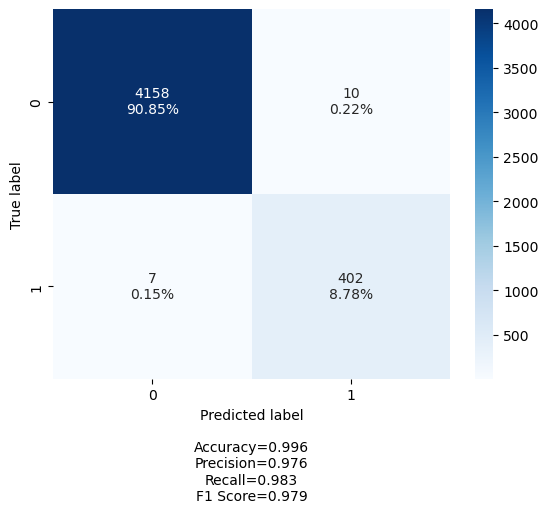

In [42]:
from confusion_matrix.cf_matrix import make_confusion_matrix

make_confusion_matrix(cm_rf)

Dada a natureza do problema, a melhor métrica para avaliá-lo é o recall, uma vez que é a sensibilidade do modelo, ou seja, dentre os asteroides que foram classificados como perigosos, quantos % deles foram de fato classificados como perigosos. Afinal, o erro de classificar um asteroide perigoso como não perigoso é muito grave.

### XGBoost

In [43]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42)
xgb_clf.fit(x_train_prepared, y_train_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [44]:
y_pred_xgb = xgb_clf.predict(x_test_prepared)

Avaliando o modelo

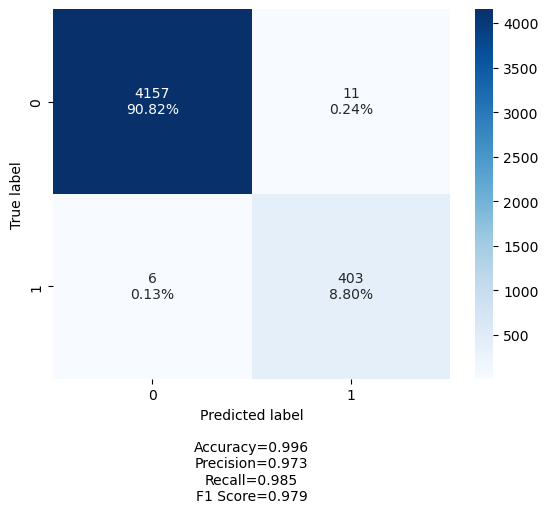

In [45]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

make_confusion_matrix(cm_xgb)